# Evaluating your GNN model


In [1]:
!pip install tcrgnn

## Evaluate a trained GNN model

First we will load the trained model. We have provided 3 pretrained models on pediatirc data, first model exclusively trained on bulk RNA-seq/TCR-seq data, second is single-cell data and the last model is a model that is trained on both bulk and single cell data

In [2]:
from tcrgnn import evaluate_model, load_test_file


cancer_test_data = load_test_file("sample_data/test_graphs_data/cancer/02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTATTGC_R1_extracted_cdr3_results_edges.tar.pt")
control_test_data = load_test_file("sample_data/test_graphs_data/control/20241106_WGS_20241106_sc_PICA0033-PICA0069_Pool_5_0_cdr3_results_edges.tar.pt")

/scratch/project_mnt/S0163/gnn_env/lib/python3.11/site-packages/torch_geometric/typing.py:54: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /scratch/project_mnt/S0163/gnn_env/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/scratch/project_mnt/S0163/gnn_env/lib/python3.11/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /scratch/project_mnt/S0163/gnn_env/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [3]:
cancer_test_data

[Data(x=[14, 14], edge_index=[2, 48], y=[1], original_characters='CAIGRGGANEKLFF'),
 Data(x=[15, 14], edge_index=[2, 54], y=[1], original_characters='CNIVGTGALTDTQYF'),
 Data(x=[15, 14], edge_index=[2, 54], y=[1], original_characters='CNIVGTGDRNQPQHF'),
 Data(x=[16, 14], edge_index=[2, 54], y=[1], original_characters='CASSDRQGRYTGELFF'),
 Data(x=[14, 14], edge_index=[2, 66], y=[1], original_characters='CASSMSTTWGELFF'),
 Data(x=[12, 14], edge_index=[2, 48], y=[1], original_characters='CSVDHRVSEQFF'),
 Data(x=[11, 14], edge_index=[2, 36], y=[1], original_characters='CATSSARRQFF'),
 Data(x=[11, 14], edge_index=[2, 44], y=[1], original_characters='CSVRVNTEAFF'),
 Data(x=[13, 14], edge_index=[2, 42], y=[1], original_characters='CAAYLQTNTEAFF'),
 Data(x=[17, 14], edge_index=[2, 64], y=[1], original_characters='CASSQEAPRGRPYEQYF'),
 Data(x=[15, 14], edge_index=[2, 60], y=[1], original_characters='CASSPGQGGFNEQFF'),
 Data(x=[12, 14], edge_index=[2, 42], y=[1], original_characters='CASGPGGDTIY

## First we will test it with our bulk model

so we load the bulk model provided

In [ ]:
model_file_bulk = "MODELS/bulk_model.pt"


In [5]:
print(type(cancer_test_data))

<class 'list'>


In [6]:
cancer_test_data_scores = evaluate_model(model_file_bulk, cancer_test_data)
cancer_test_data_scores

[0.9869847893714905,
 0.9999637603759766,
 0.9993211030960083,
 0.9329238533973694,
 0.7272771000862122,
 0.9992175102233887,
 0.9105676412582397,
 0.7100573778152466,
 0.9597365260124207,
 0.994687557220459,
 0.9297816157341003,
 0.8284499049186707,
 0.9832783341407776,
 0.055566754192113876,
 0.9308387637138367,
 0.2095518261194229,
 0.9993755221366882,
 0.9969912767410278,
 0.9695559740066528,
 0.998492956161499,
 0.796308159828186,
 0.9912521243095398,
 0.4680953621864319,
 0.7274922132492065,
 0.437423974275589,
 0.21485987305641174,
 0.9986151456832886,
 0.9093158841133118,
 0.9993036985397339,
 0.29696160554885864,
 0.37683790922164917,
 0.9070925712585449,
 0.30665579438209534,
 0.43556466698646545,
 0.9633184671401978,
 0.8824449181556702,
 0.8993093371391296,
 0.08497097343206406,
 0.5015463829040527,
 0.7825937271118164,
 0.14944979548454285,
 0.9879840612411499,
 0.2511428892612457,
 0.9078717827796936,
 0.985771656036377,
 0.7100573778152466]

You can also export the scores with the sequences to a txt file, that will be useful for your downstream analyses for the future

In [17]:
from tcrgnn import write_scores_to_txt
import pandas as pd

# Extract original sequences from each graph object
cancer_sequences = [
    getattr(g, "original_characters", None)
    for g in cancer_test_data
]

# Optional sanity check
if any(seq is None for seq in cancer_sequences):
    print("Warning: Some graphs have no 'original_characters' attribute.")

# Write scores and sequences to a text file
write_scores_to_txt(cancer_test_data_scores, "cancer_test_data_scores.txt", cancer_sequences)


## Now for control test data

In [8]:
control_test_data_scores = evaluate_model(model_file_bulk, control_test_data)
control_test_data_scores

[0.11317579448223114,
 0.472919762134552,
 0.8127340078353882,
 0.9447591304779053,
 0.903327465057373,
 0.5190760493278503,
 0.5229328870773315,
 0.8390083909034729,
 0.4917598068714142,
 0.595949113368988,
 0.8616299033164978,
 0.7973927855491638,
 0.8264372944831848,
 0.48506560921669006,
 0.9947080612182617,
 0.9999535083770752,
 0.994573175907135,
 0.9713305830955505,
 0.9912185072898865,
 0.35103297233581543,
 0.3312646150588989,
 0.7002474665641785,
 0.9605942368507385,
 0.4328811466693878,
 0.19187617301940918,
 0.9961522221565247,
 0.015411226078867912,
 0.2834042012691498,
 0.996427595615387,
 0.8186561465263367,
 0.9109799861907959,
 0.9741676449775696,
 0.9722270965576172,
 0.9998406171798706,
 0.5174252390861511,
 0.5409242510795593,
 0.050671350210905075,
 0.11703277379274368,
 0.7494786977767944,
 0.9117313623428345,
 0.8116556406021118,
 0.40464574098587036,
 0.792904257774353,
 0.6509836316108704,
 0.08955928683280945,
 0.60381019115448,
 0.9484279155731201,
 0.9630187

In [18]:
# Extract original sequences from each graph object
control_sequences = [
    getattr(g, "original_characters", None)
    for g in control_test_data
]

# Optional sanity check
if any(seq is None for seq in control_sequences):
    print("Warning: Some graphs have no 'original_characters' attribute.")

# Write scores and sequences to a text file
write_scores_to_txt(control_test_data_scores, "control_test_data_scores.txt", control_sequences)

## Now you can plot the boxplot visualising the sample score distribtuion

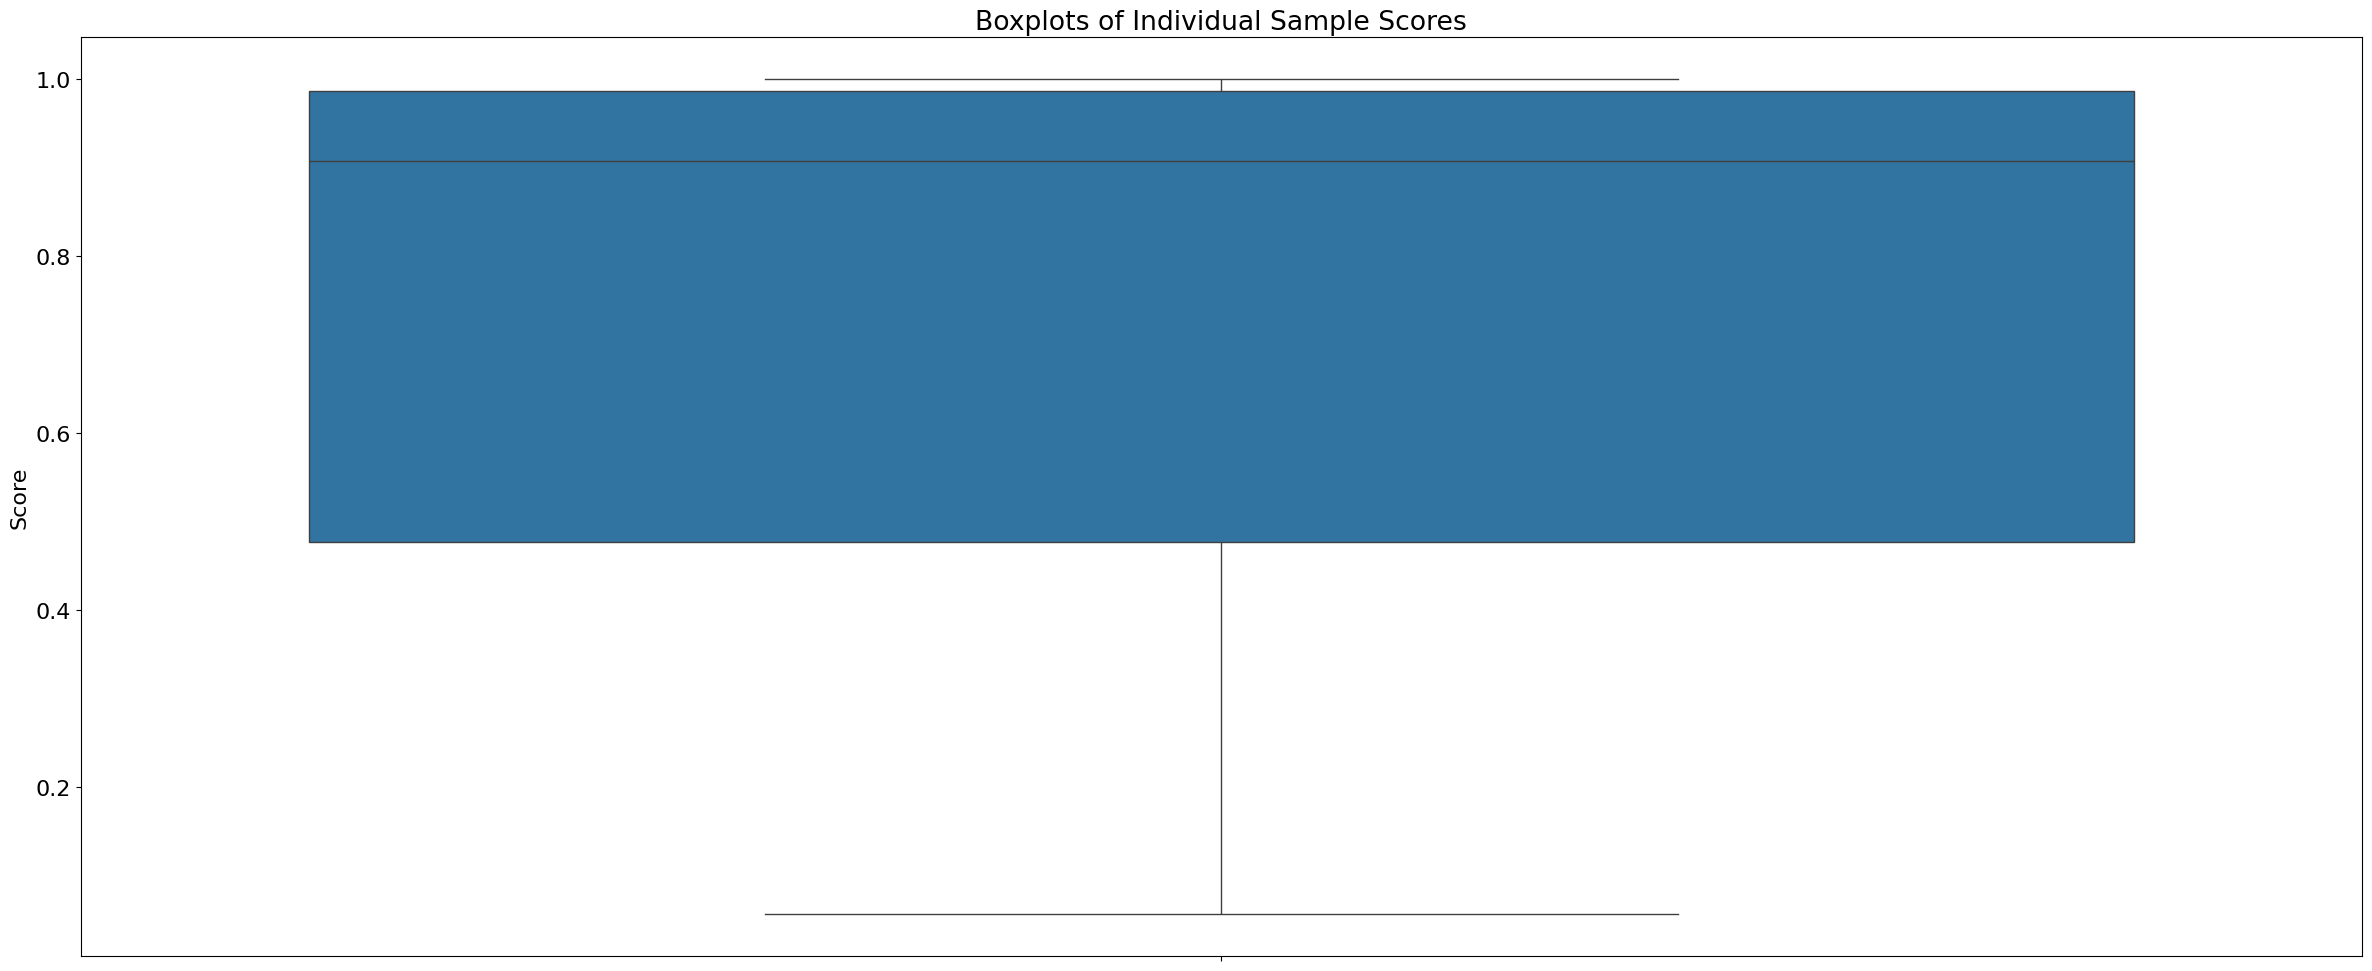

In [9]:
%matplotlib inline
from tcrgnn import boxplot_individual_sample
boxplot_individual_sample(cancer_test_data_scores)

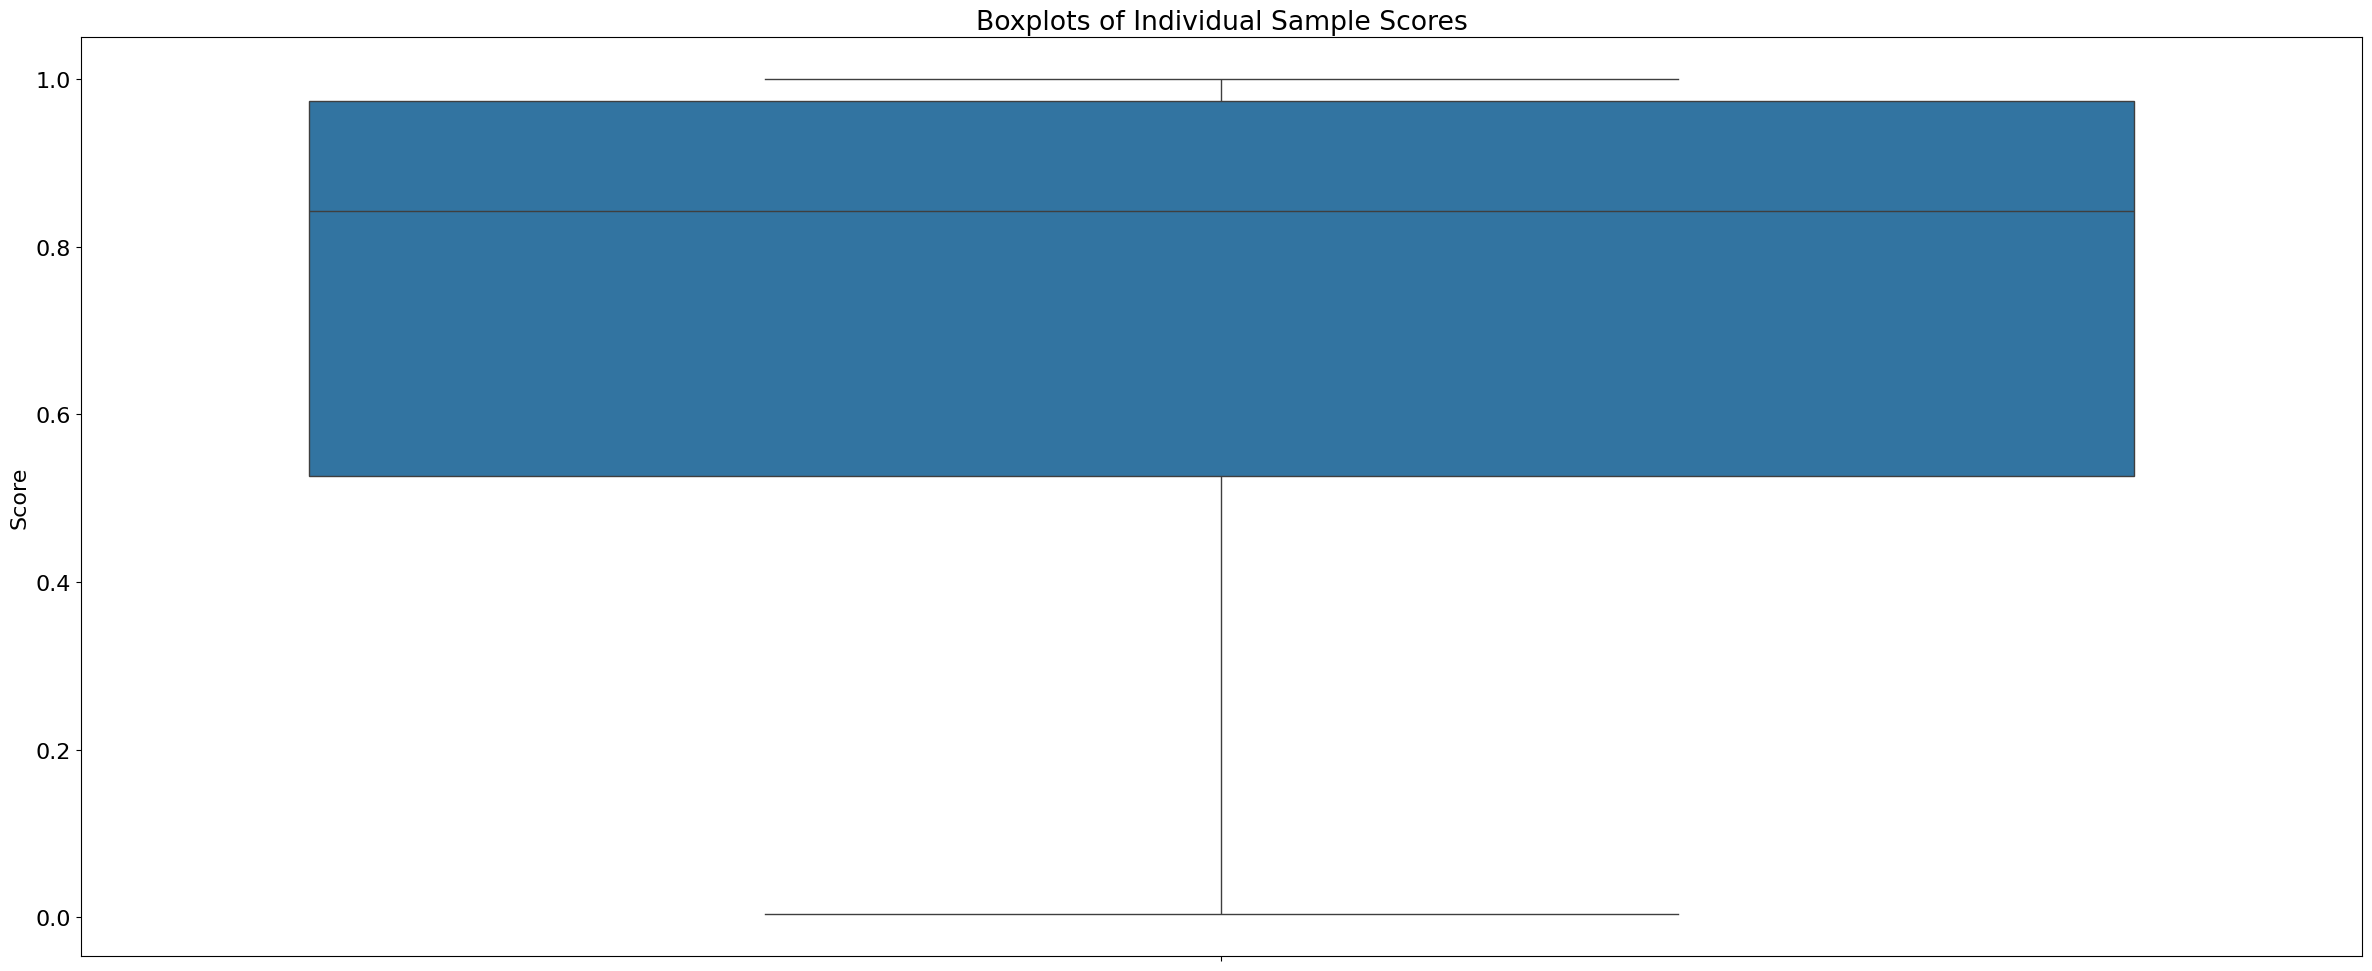

In [10]:
boxplot_individual_sample(control_test_data_scores)

# Multiple Samples

Now you probably have more than one sample to test it upon, we will construct a list of samples to pass into our testing function. also, we will construct a dataframe to keep track of every sequence from every sample to make plotting conviienent and more downstream analyses to be simpler.

In [11]:
from pathlib import Path
import pandas as pd
import itertools
import numpy as np

cancer_graphs_dir = Path("sample_data/test_graphs_data/cancer")

sources, sequences, scores = [], [], []

for cancer_file in sorted(p for p in cancer_graphs_dir.iterdir() if p.is_file()):
    cancer_sample_data = load_test_file(cancer_file)

    # run your model once per file
    cancer_sample_scores = evaluate_model(model_file_bulk, cancer_sample_data)

    # make sure scores are iterable and same length as sample_data
    cancer_sample_scores = np.atleast_1d(cancer_sample_scores)

    seqs = [getattr(g, "original_characters", None) for g in cancer_sample_data]
    n = len(seqs)

    if len(cancer_sample_scores) != n:
        raise ValueError(
            f"Mismatch: {cancer_file.name} has {n} sequences but {len(cancer_sample_scores)} scores."
        )

    sequences.extend(seqs)
    scores.extend(cancer_sample_scores)
    sources.extend(itertools.repeat(cancer_file.name, n))

# Build the DataFrame once
cancer_df = pd.DataFrame(
    {"source": sources, "sequence": sequences, "scores": scores},
    copy=False,
)

print(f"{len(cancer_df)} sequences from {len(list(cancer_graphs_dir.iterdir()))} cancer samples processed.")
print(cancer_df.head())


1114 sequences from 5 cancer samples processed.
                                              source          sequence  \
0  02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...    CAIGRGGANEKLFF   
1  02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...   CNIVGTGALTDTQYF   
2  02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...   CNIVGTGDRNQPQHF   
3  02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...  CASSDRQGRYTGELFF   
4  02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...    CASSMSTTWGELFF   

     scores  
0  0.986985  
1  0.999964  
2  0.999321  
3  0.932924  
4  0.727277  


In [12]:
from pathlib import Path
import pandas as pd
import itertools
import numpy as np

control_graphs_dir = Path("sample_data/test_graphs_data/control")

sources, sequences, scores = [], [], []

for control_file in sorted(p for p in control_graphs_dir.iterdir() if p.is_file()):
    control_sample_data = load_test_file(control_file)

    # run your model once per file
    control_sample_scores = evaluate_model(model_file_bulk, control_sample_data)

    # ensure iterable and match counts
    control_sample_scores = np.atleast_1d(control_sample_scores)

    seqs = [getattr(g, "original_characters", None) for g in control_sample_data]
    n = len(seqs)

    if len(control_sample_scores) != n:
        raise ValueError(
            f"Mismatch: {control_file.name} has {n} sequences but {len(control_sample_scores)} scores."
        )

    sequences.extend(seqs)
    scores.extend(control_sample_scores)
    sources.extend(itertools.repeat(control_file.name, n))

# build DataFrame once
control_df = pd.DataFrame(
    {"source": sources, "sequence": sequences, "scores": scores},
    copy=False,
)

print(f"{len(control_df)} sequences from {len(list(control_graphs_dir.iterdir()))} control samples processed.")
print(control_df.head())


18042 sequences from 3 control samples processed.
                                              source         sequence  \
0  20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...   CSASPGRSGDTQYF   
1  20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...   CASSESGETGELFF   
2  20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...  CASSDLGVSTDTQYF   
3  20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...  CASSLIARTDNEQFF   
4  20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...  CASSQESTASYEQYF   

     scores  
0  0.113176  
1  0.472920  
2  0.812734  
3  0.944759  
4  0.903327  


## Now we are going to use aggregate the sample scores to have a clear overview of our model's performance

We use inv-logit-mean metric here to aggregate the indinivdual sequence scores per sample. PLease refer to the section of "Why use inv-logit-mean" in the posthoc scoring adjustment page in the docs for more details.




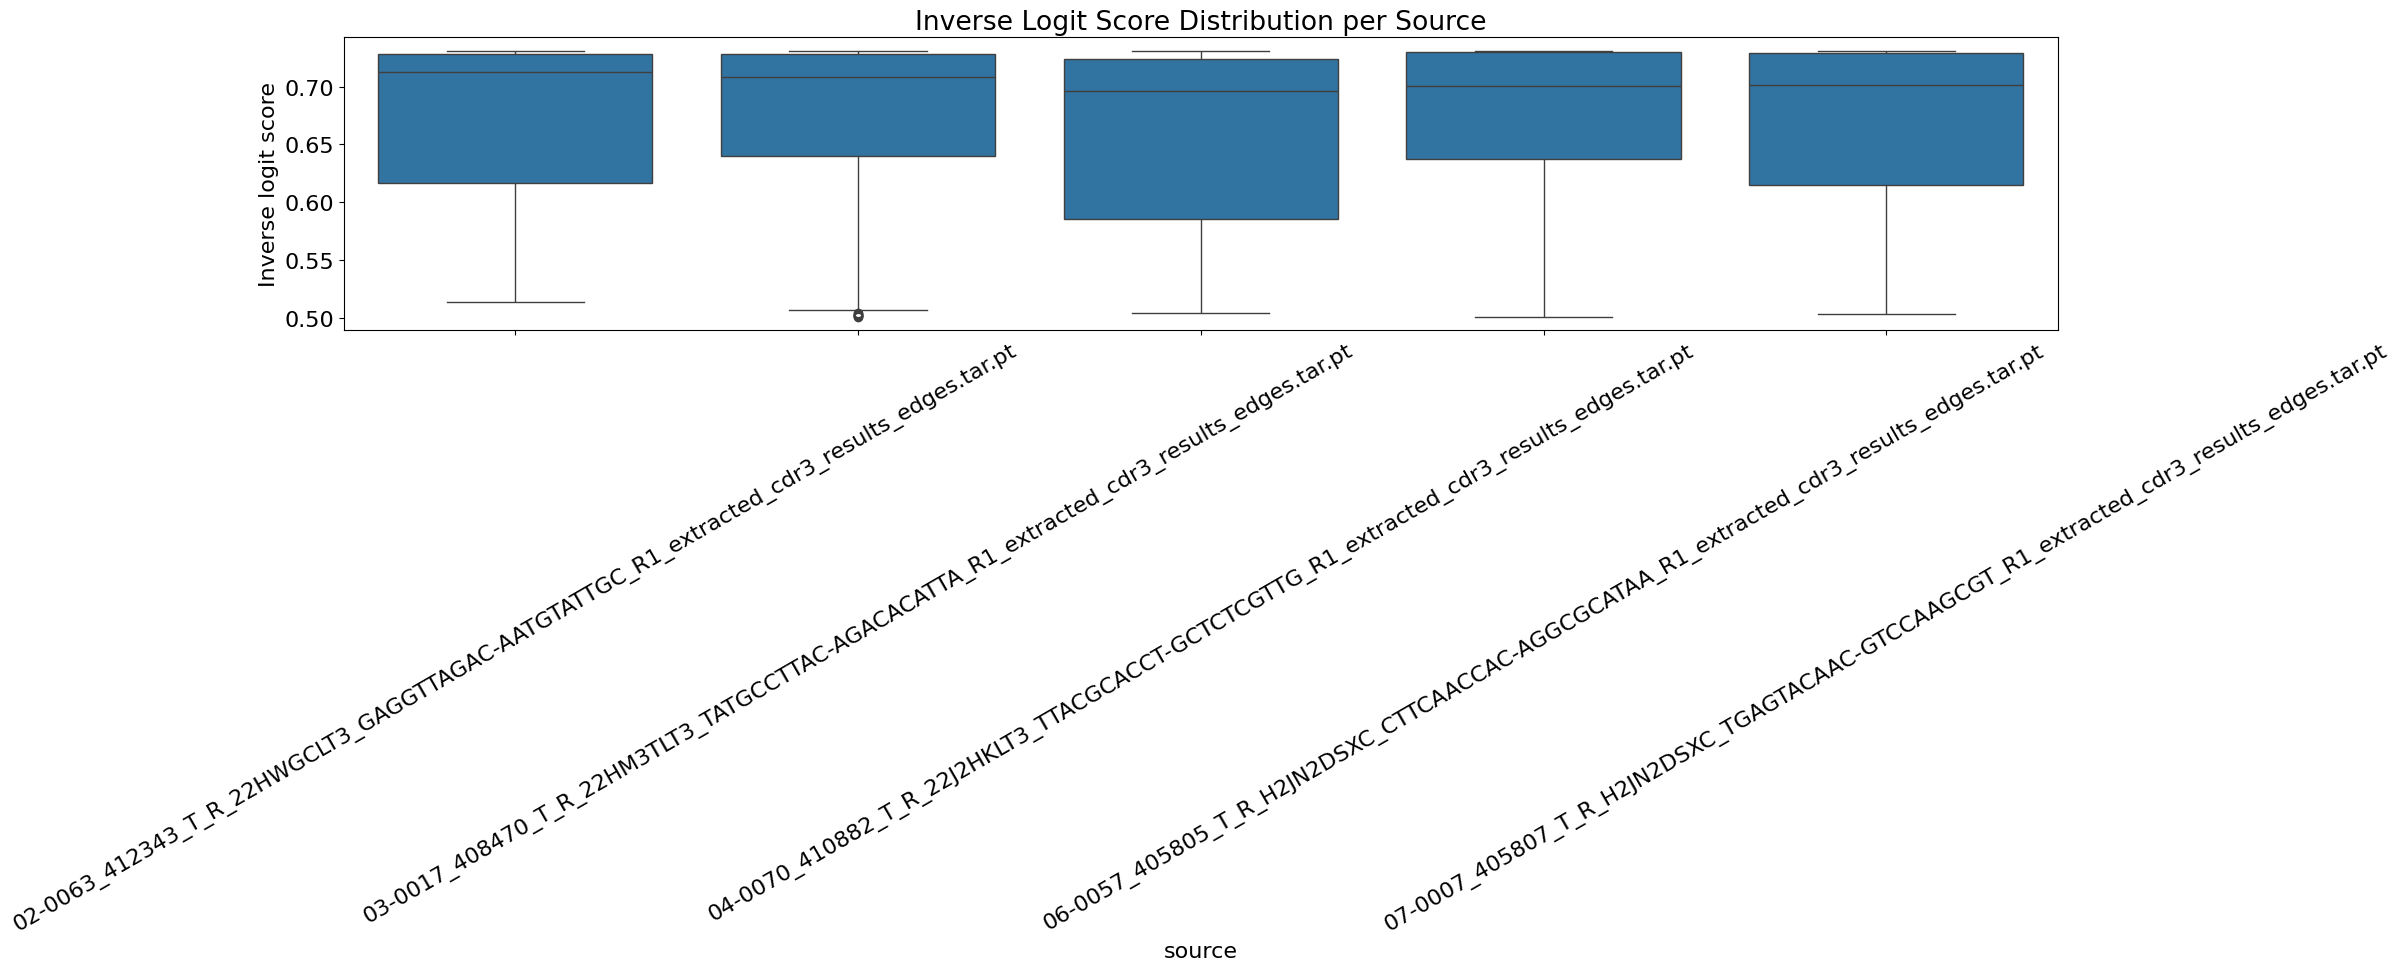

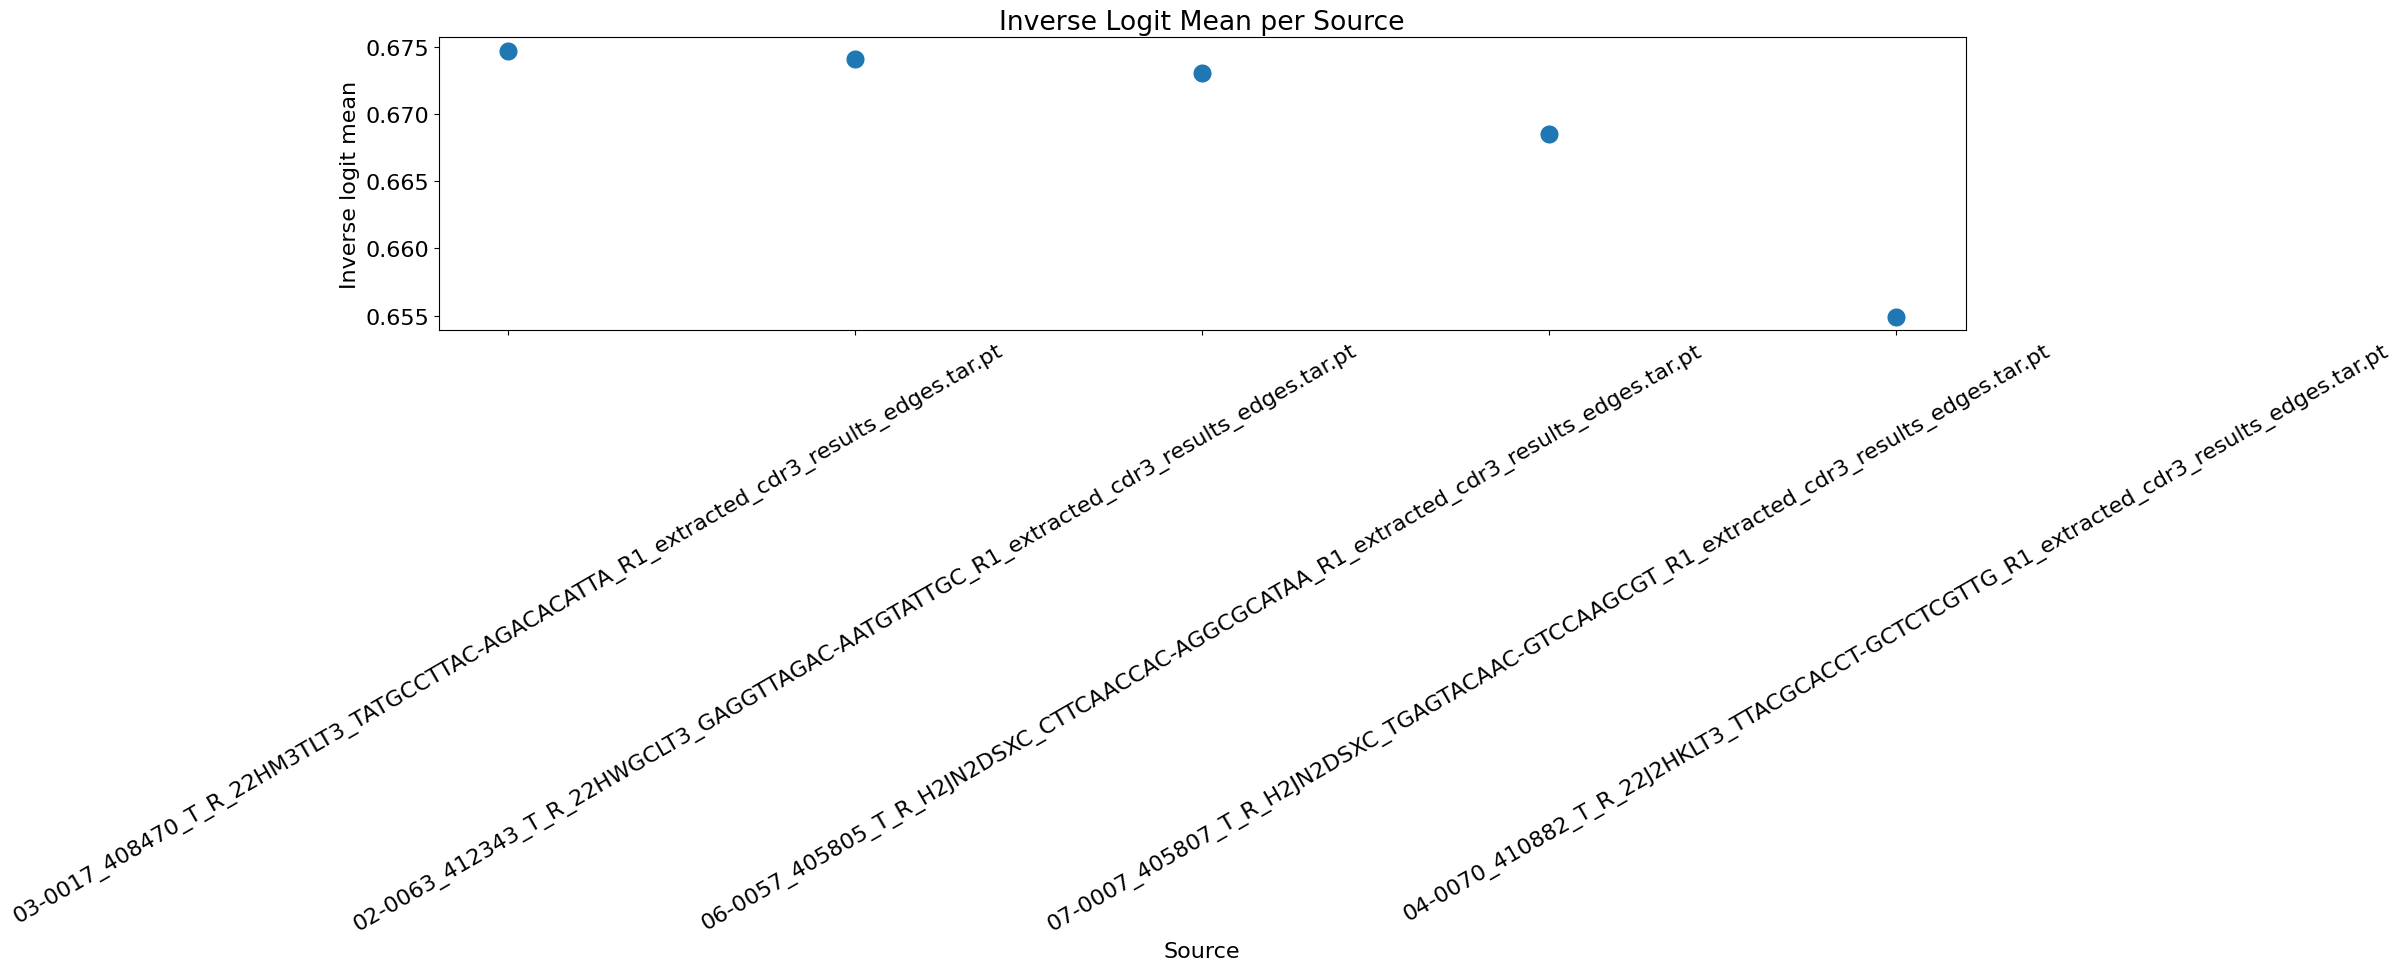

,source,inv_logit_mean
0,03-0017_408470_T_R_22HM3TLT3_TATGCCTTAC-AGACAC...,0.674706
1,02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...,0.674109
2,06-0057_405805_T_R_H2JN2DSXC_CTTCAACCAC-AGGCGC...,0.673046
3,07-0007_405807_T_R_H2JN2DSXC_TGAGTACAAC-GTCCAA...,0.668532
4,04-0070_410882_T_R_22J2HKLT3_TTACGCACCT-GCTCTC...,0.654900


In [13]:
from tcrgnn import plot_inv_logit_per_source
summary_cancer_df = plot_inv_logit_per_source(cancer_df)
summary_cancer_df

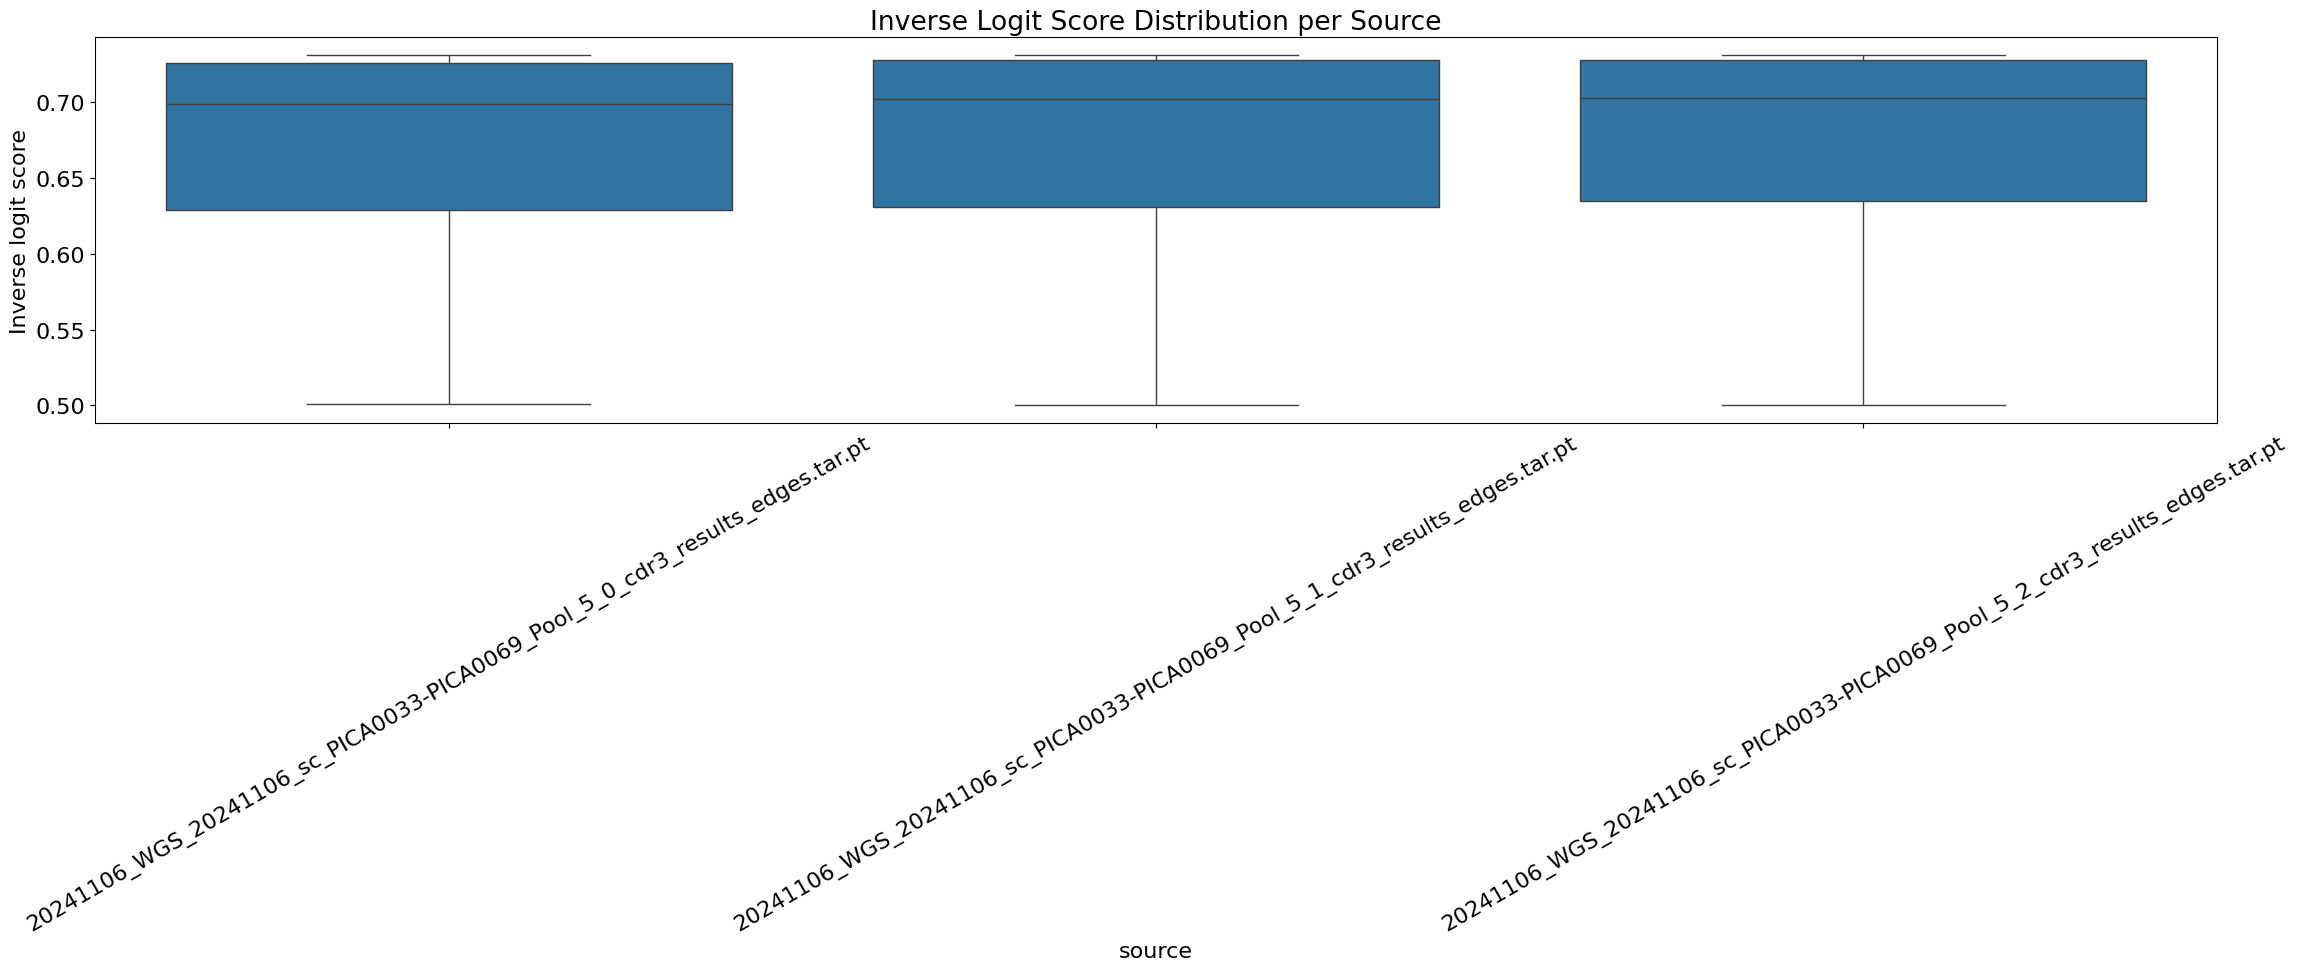

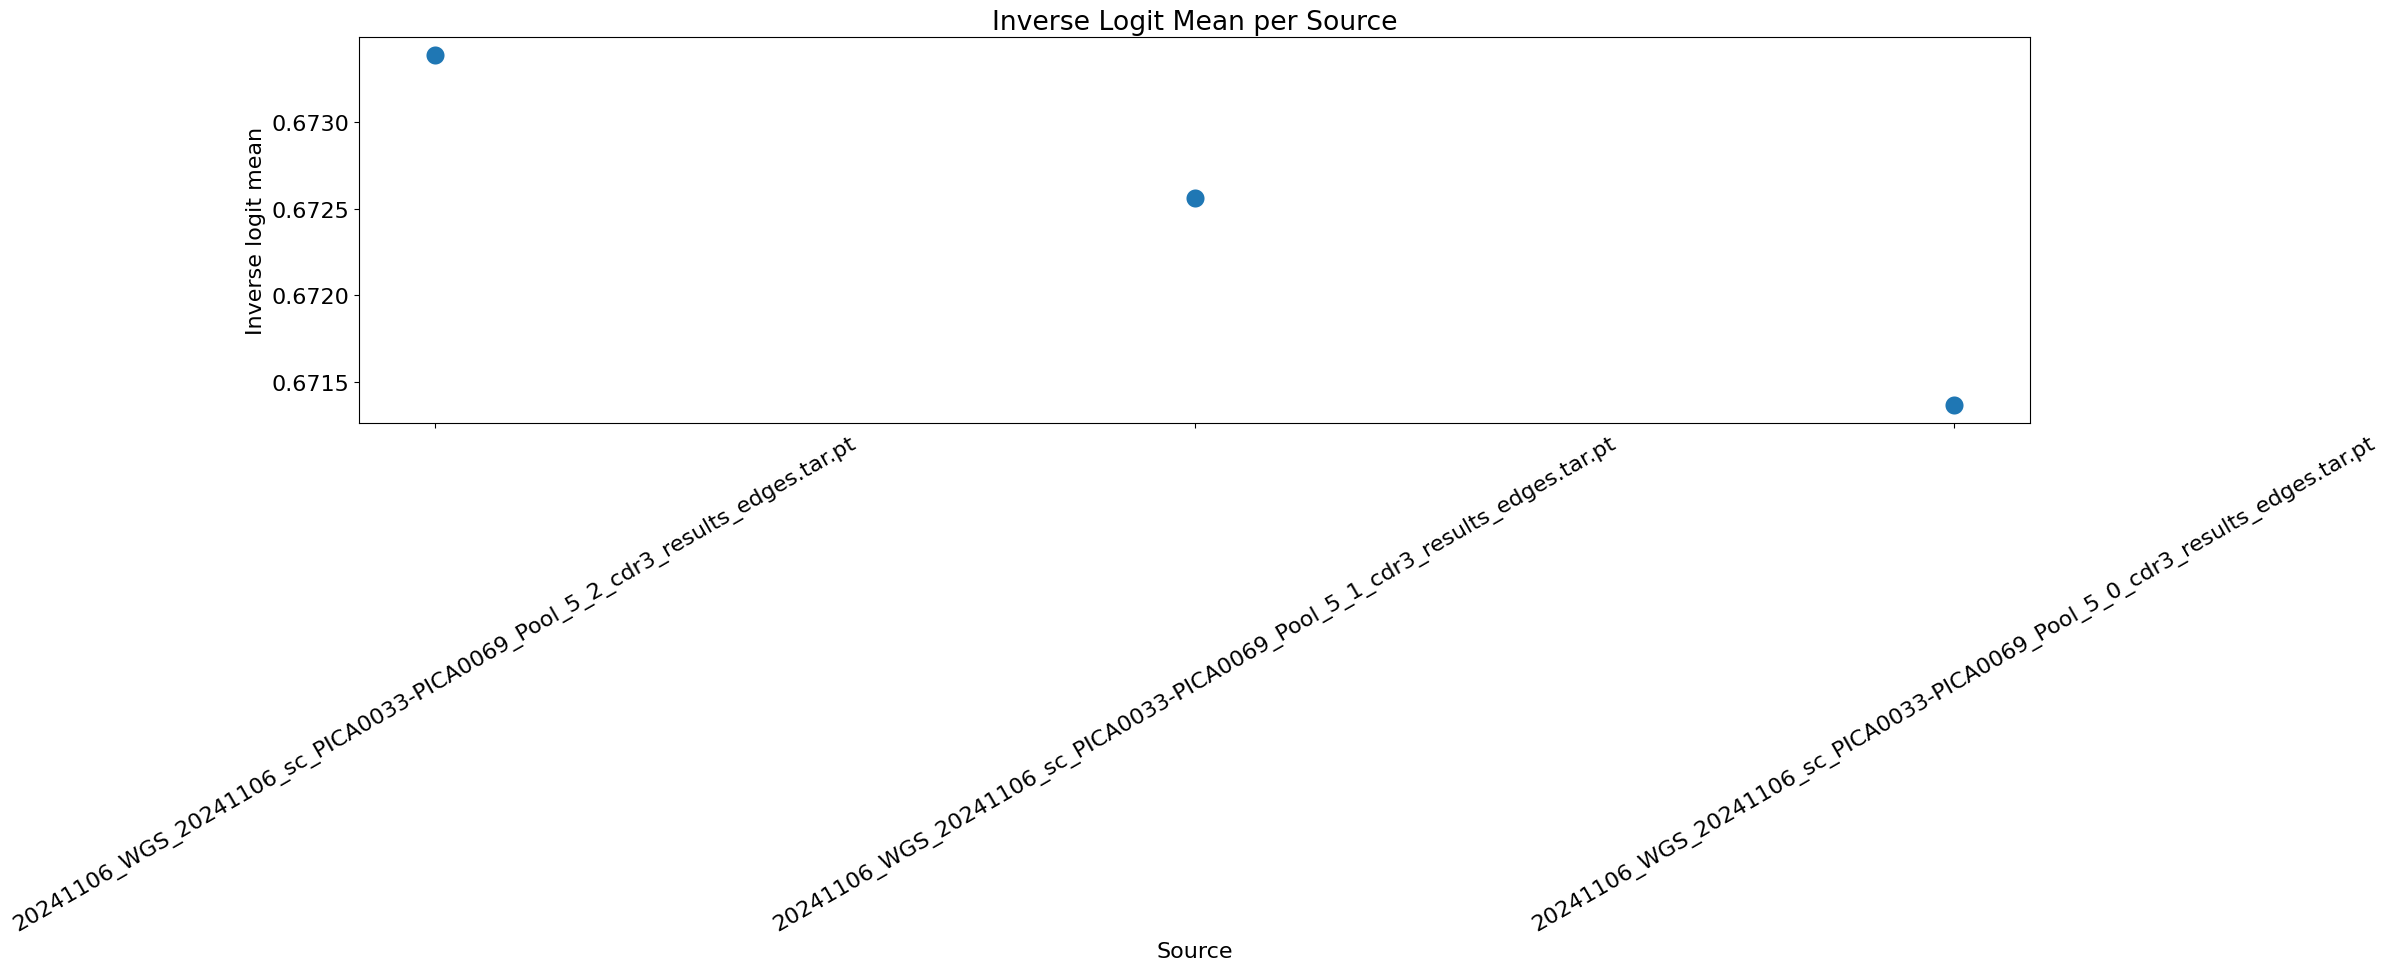

,source,inv_logit_mean
0,20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...,0.673387
1,20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...,0.672563
2,20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...,0.671366


In [14]:
from tcrgnn import plot_inv_logit_per_source
summary_control_df = plot_inv_logit_per_source(control_df)
summary_control_df

# Now we want to compare between the cancer and control samples

So we will plot the overall boxplot between cancer and control samples then the ROC scores between them
Note that this is just a subset of our samples, please refer to our research output paper for the full comparison of ROC scores

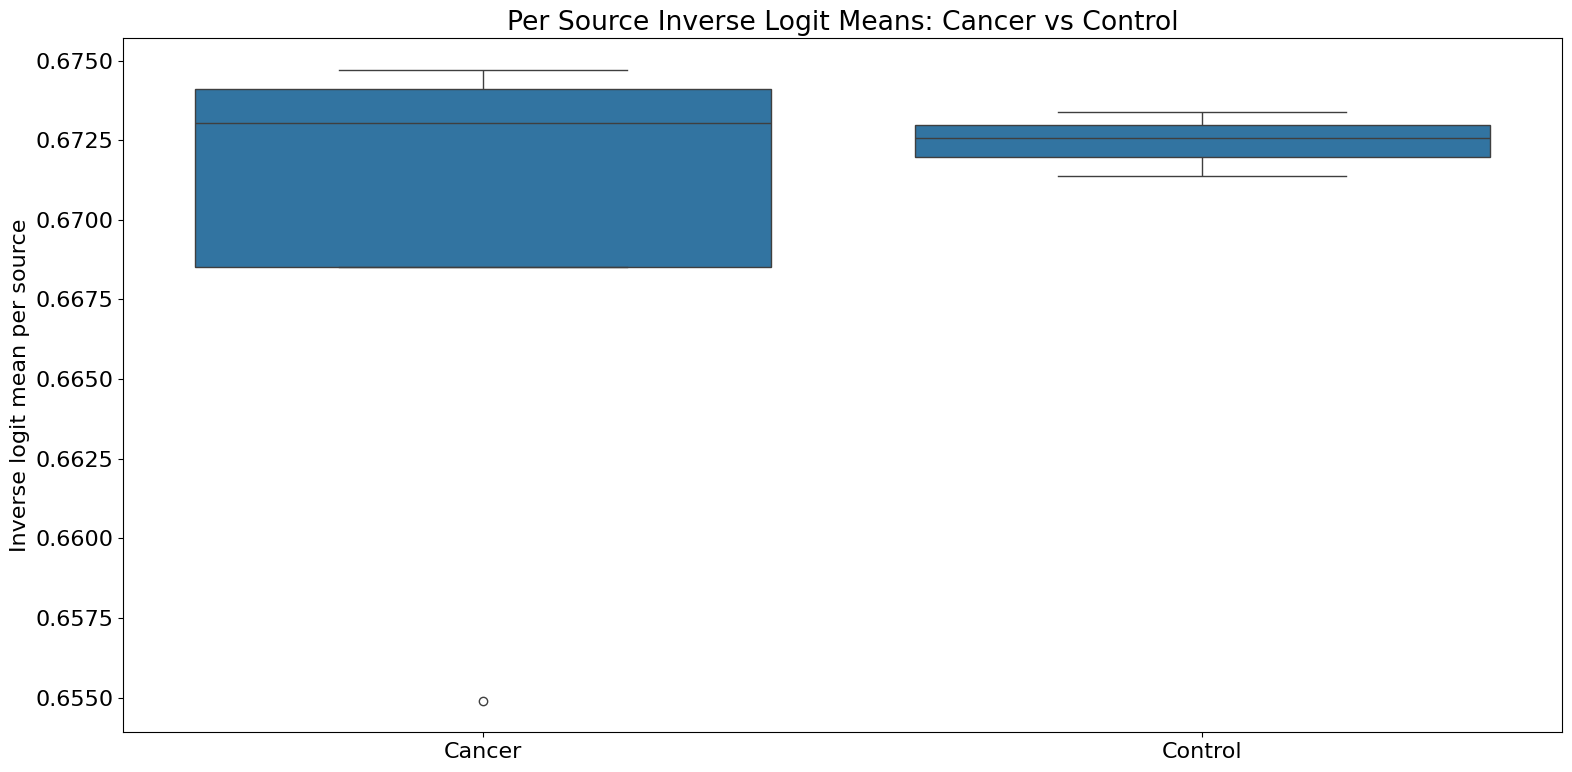

,source,group,inv_logit_mean
0,03-0017_408470_T_R_22HM3TLT3_TATGCCTTAC-AGACAC...,Cancer,0.674706
1,02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTA...,Cancer,0.674109
2,06-0057_405805_T_R_H2JN2DSXC_CTTCAACCAC-AGGCGC...,Cancer,0.673046
3,07-0007_405807_T_R_H2JN2DSXC_TGAGTACAAC-GTCCAA...,Cancer,0.668532
4,04-0070_410882_T_R_22J2HKLT3_TTACGCACCT-GCTCTC...,Cancer,0.654900
5,20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...,Control,0.673387
6,20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...,Control,0.672563
7,20241106_WGS_20241106_sc_PICA0033-PICA0069_Poo...,Control,0.671366


In [15]:
from tcrgnn import plot_roc_from_summary,summarize_and_plot_inv_logit_means

# Now we want to compare between the cancer and control samples
summary_long,summary_wide = summarize_and_plot_inv_logit_means(cancer_df,control_df)
summary_long

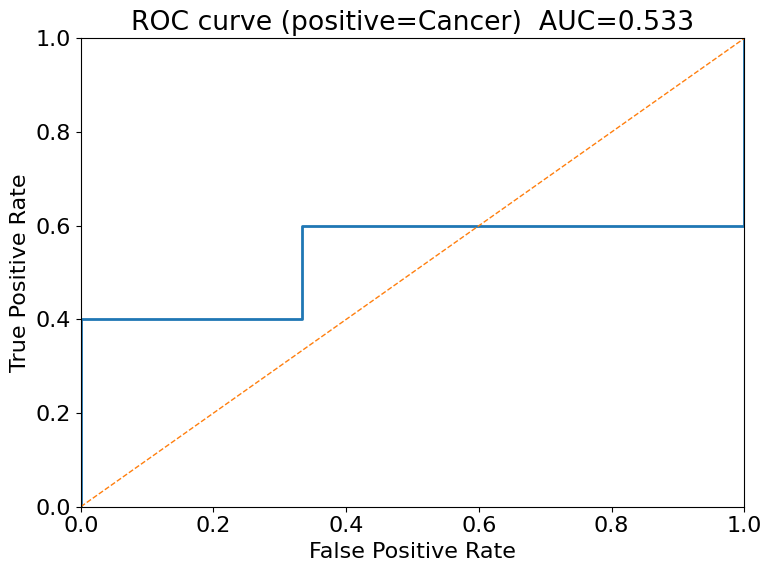

(        fpr  tpr  threshold
 0  0.000000  0.0        inf
 1  0.000000  0.2   0.674706
 2  0.000000  0.4   0.674109
 3  0.333333  0.4   0.673387
 4  0.333333  0.6   0.673046
 5  0.666667  0.6   0.672563
 6  1.000000  0.6   0.671366
 7  1.000000  0.8   0.668532
 8  1.000000  1.0   0.654900
 9  1.000000  1.0       -inf,
 0.5333333333333333)

In [16]:
## Now to plot ROC curve between cancer and control samples
plot_roc_from_summary(summary_long)

## Try swapping the model and see if there's any performance improvements!